In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')

In [3]:
movies.head(10)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
movies_ohe = movies.drop('genres', axis=1).join(movies.genres.str.get_dummies())


In [5]:
pd.options.display.max_columns=100


In [6]:
movies_ohe.head()


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)


In [9]:
stat1 = stat1.transpose().drop(0,axis=1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})


In [10]:
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})


In [12]:
stat2 = stat2[stat2['genre_count']==1].drop('movieId',axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)


In [13]:
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)


In [14]:
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)

In [15]:

stat

,No. of movies,title,No. of movies with only 1 genre
Drama,4361,Nixon (1995)Othello (1995)Dangerous Minds (199...,1053
Comedy,3756,Father of the Bride Part II (1995)Four Rooms (...,946
Thriller,1894,Jade (1995)Safe (1995)Hideaway (1995)Red Rock ...,84
Action,1828,Sudden Death (1995)Fair Game (1995)Under Siege...,60
Romance,1596,Jack and Sarah (1995)Hustler White (1996)Kama ...,21
Adventure,1263,"Mark of Zorro, The (1940)Firewalker (1986)Beyo...",12
Crime,1199,Gridlock'd (1997)Gang Related (1997)Clay Pigeo...,12
Sci-Fi,980,2010: The Year We Make Contact (1984)Meteor (1...,37
Horror,978,Lord of Illusions (1995)Castle Freak (1995)Cem...,167
Fantasy,779,"Andalusian Dog, An (Chien andalou, Un) (1929)M...",4


Text(0.5, 1.0, 'distribution of number of genres')

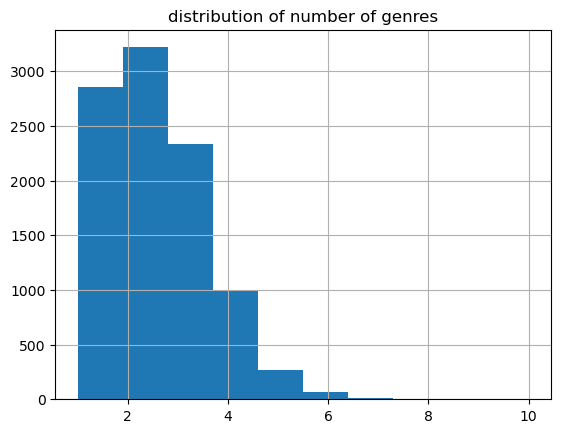

In [16]:

import matplotlib.pyplot as plt
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

In [17]:
movies_ohe.set_index(['movieId','title'],inplace=True)

In [18]:
frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)

C:\Users\moon\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:

frequent_itemsets_movies

,support,itemsets
0,0.187641,(Action)
1,0.129645,(Adventure)
2,0.062718,(Animation)
3,0.068158,(Children)
4,0.385547,(Comedy)
5,0.123075,(Crime)
6,0.045165,(Documentary)
7,0.447649,(Drama)
8,0.079963,(Fantasy)
9,0.100390,(Horror)


In [20]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)


In [21]:
rules_movies


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Action),(Adventure),0.187641,0.129645,0.062615,0.333698,2.573940,0.038289,1.306247,0.752735
1,(Adventure),(Action),0.129645,0.187641,0.062615,0.482977,2.573940,0.038289,1.571224,0.702576
2,(Action),(Crime),0.187641,0.123075,0.042907,0.228665,1.857929,0.019813,1.136892,0.568426
3,(Crime),(Action),0.123075,0.187641,0.042907,0.348624,1.857929,0.019813,1.247142,0.526575
4,(Action),(Sci-Fi),0.187641,0.100595,0.046294,0.246718,2.452576,0.027419,1.193981,0.729069
5,(Sci-Fi),(Action),0.100595,0.187641,0.046294,0.460204,2.452576,0.027419,1.504937,0.658508
6,(Action),(Thriller),0.187641,0.194416,0.067235,0.358315,1.843034,0.030754,1.255420,0.563072
7,(Thriller),(Action),0.194416,0.187641,0.067235,0.345829,1.843034,0.030754,1.241814,0.567807
8,(Animation),(Adventure),0.062718,0.129645,0.025354,0.404255,3.118175,0.017223,1.460953,0.724755
9,(Adventure),(Animation),0.129645,0.062718,0.025354,0.195566,3.118175,0.017223,1.165145,0.780486


In [22]:
rules_movies[(rules_movies.conviction>1.25)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Action),(Adventure),0.187641,0.129645,0.062615,0.333698,2.573940,0.038289,1.306247,0.752735
1,(Adventure),(Action),0.129645,0.187641,0.062615,0.482977,2.573940,0.038289,1.571224,0.702576
5,(Sci-Fi),(Action),0.100595,0.187641,0.046294,0.460204,2.452576,0.027419,1.504937,0.658508
6,(Action),(Thriller),0.187641,0.194416,0.067235,0.358315,1.843034,0.030754,1.255420,0.563072
8,(Animation),(Adventure),0.062718,0.129645,0.025354,0.404255,3.118175,0.017223,1.460953,0.724755
11,(Children),(Adventure),0.068158,0.129645,0.032026,0.469880,3.624360,0.023190,1.641806,0.777052
12,(Adventure),(Fantasy),0.129645,0.079963,0.034285,0.264450,3.307149,0.023918,1.250815,0.801540
13,(Fantasy),(Adventure),0.079963,0.129645,0.034285,0.428755,3.307149,0.023918,1.523610,0.758257
15,(Sci-Fi),(Adventure),0.100595,0.129645,0.031410,0.312245,2.408464,0.018369,1.265502,0.650205
16,(Animation),(Children),0.062718,0.068158,0.031000,0.494272,7.251799,0.026725,1.842573,0.919791


In [23]:
rules_movies[(rules_movies.conviction>1.5)].sort_values(by=['lift','conviction'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(Animation),(Children),0.062718,0.068158,0.031000,0.494272,7.251799,0.026725,1.842573,0.919791
17,(Children),(Animation),0.068158,0.062718,0.031000,0.454819,7.251799,0.026725,1.719213,0.925161
11,(Children),(Adventure),0.068158,0.129645,0.032026,0.469880,3.624360,0.023190,1.641806,0.777052
13,(Fantasy),(Adventure),0.079963,0.129645,0.034285,0.428755,3.307149,0.023918,1.523610,0.758257
30,(Mystery),(Thriller),0.058817,0.194416,0.036338,0.617801,3.177729,0.024902,2.107761,0.728137
1,(Adventure),(Action),0.129645,0.187641,0.062615,0.482977,2.573940,0.038289,1.571224,0.702576
36,"(Drama, Crime)",(Thriller),0.065387,0.194416,0.031718,0.485086,2.495096,0.019006,1.564503,0.641136
5,(Sci-Fi),(Action),0.100595,0.187641,0.046294,0.460204,2.452576,0.027419,1.504937,0.658508
22,(Crime),(Thriller),0.123075,0.194416,0.058407,0.474562,2.440963,0.034479,1.533167,0.673177
28,(Horror),(Thriller),0.100390,0.194416,0.047116,0.469325,2.414026,0.027598,1.518037,0.651120


In [24]:
pd.options.display.max_rows=50


In [25]:
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))]


,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
53,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
95,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical
109,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
...,...,...,...
9428,166203,Sapphire Blue (2014),Adventure|Children|Fantasy|Sci-Fi
9565,173873,Gulliver's Travels (1996),Adventure|Children|Fantasy
9636,179401,Jumanji: Welcome to the Jungle (2017),Action|Adventure|Children
9697,184987,A Wrinkle in Time (2018),Adventure|Children|Fantasy|Sci-Fi
